<a href="https://colab.research.google.com/github/ElkinGuarin/instrumentos-opticos/blob/main/EliminarRuido4c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

import numpy as np
import matplotlib.pyplot as plt
import cv2


In [4]:
def ploteo_complejo(mat, indicador,escala):
    if(indicador=="I"):
        mat=np.abs(mat)**2
    elif(indicador=="A"):
        mat=np.abs(mat)
    elif(indicador=="P"):
        mat=no.angle(mat)
    
    if(escala==1):
        plt.figure()
        plt.imshow(mat)
        plt.show()
        
    else:
        plt.figure()
        plt.imshow(np.log(mat+0.00001))
        plt.show()
        
    return 0

In [5]:

#importando imag
img=cv2.imread('b.png',0)
fft_img_prev=np.fft.fftn(img)
fft_img=np.fft.fftshift(fft_img_prev)

fft_inv=np.fft.ifft2(fft_img)


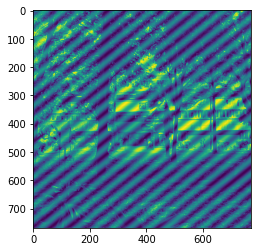

In [6]:
#%matplotlib qt
plt.figure()
plt.imshow(img)
#plt.colorbar()
plt.show()

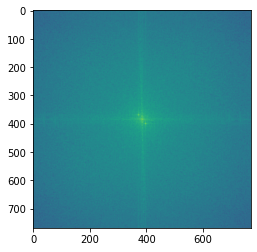

0

In [7]:
ploteo_complejo(fft_img, "I",0)

384


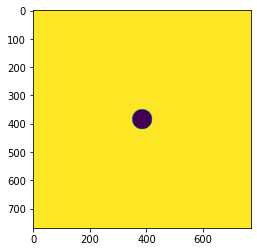

In [9]:
#mascara circular
mask2= np.ones(np.shape(img), dtype="uint8")

coordy=int(np.shape(img)[0]/2)
coordx=int(np.shape(img)[1]/2)
print(coordx)

cv2.circle(mask2,(coordx, coordy), 35,0,-1)
plt.figure()
plt.imshow(mask2)
plt.show()

In [10]:
new_imag=np.fft.fftn(mask2*fft_img) #filtrado bajas frecuencias

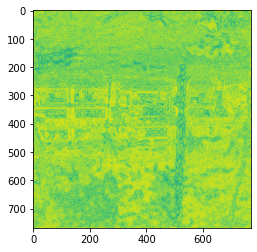

In [11]:
ploteo_complejo(new_imag, "I",0);

In [39]:
fft_inv1=np.fft.ifftshift(new_imag)